EJEMPLO KNN

CARGAR DATASET - FIBRA OPTICA

In [ ]:
pip install scikit-learn

In [38]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
data = pd.read_csv("D:\MAXITEL\Escritorio\ginger\MAESTRIA\INTELIGENCIA ARTIFICIAL\proyecto-ml-telecom\Supervisado/ocrdataset.csv")
data.head()

,Tx,Rx,Various Points,SNR Receiver,SNR Stages,BER Receiver,BER Environmental,Modulation Format,Modulation Depth,Transmission Distance,...,Fiber Attenuation,Splice Losses,Optical Amplifier Gain,PMD Coefficient,PMD Compensation,CD Coefficient,CD Compensation,Temperature,Humidity,Signal Quality
0,10.5,15.2,12.8,23.6,22.1,0.000001,0.000002,AM,0.8,20,...,0.10,0.20,10,0.05,PMD Compensated,0.03,CD Compensated,25.0,60.0,Good
1,11.2,16.5,12.6,24.2,22.8,0.000001,0.000002,FM,0.7,21,...,0.11,0.22,12,0.06,PMD Compensated,0.04,CD Compensated,26.0,61.0,Good
2,9.8,14.8,12.9,23.4,21.9,0.000001,0.000001,PM,0.9,19,...,0.09,0.18,9,0.04,PMD Compensated,0.02,CD Compensated,24.0,59.0,Good
3,12.1,18.2,13.2,24.8,23.5,0.000002,0.000002,AM,0.8,22,...,0.12,0.24,11,0.07,PMD Compensated,0.05,CD Compensated,27.0,62.0,Good
4,10.9,15.8,13.0,24.0,22.5,0.000001,0.000002,FM,0.7,20,...,0.10,0.20,10,0.05,PMD Compensated,0.03,CD Compensated,25.0,60.0,Good


Separar características (X) y etiquetas (y)

In [36]:
df = pd.read_csv("D:\MAXITEL\Escritorio\ginger\MAESTRIA\INTELIGENCIA ARTIFICIAL\proyecto-ml-telecom\Supervisado/ocrdataset.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print("Features:", X.shape)
print("Labels:", y.shape)
print("First 5 samples of features:\n", X[:5])
print("First 5 samples of labels:\n", y[:5])

Features: (586, 20)
Labels: (586,)
First 5 samples of features:
 [[10.5 15.2 12.8 23.6 22.1 1.2e-06 1.5e-06 'AM' 0.8 20 5 0.1 0.2 10 0.05
  'PMD Compensated' 0.03 'CD Compensated' 25.0 60.0]
 [11.2 16.5 12.6 24.2 22.8 1.4e-06 1.6e-06 'FM' 0.7 21 6 0.11 0.22 12
  0.06 'PMD Compensated' 0.04 'CD Compensated' 26.0 61.0]
 [9.8 14.8 12.9 23.4 21.9 1.1e-06 1.4e-06 'PM' 0.9 19 4 0.09 0.18 9 0.04
  'PMD Compensated' 0.02 'CD Compensated' 24.0 59.0]
 [12.1 18.2 13.2 24.8 23.5 1.6e-06 1.7e-06 'AM' 0.8 22 7 0.12 0.24 11
  0.07 'PMD Compensated' 0.05 'CD Compensated' 27.0 62.0]
 [10.9 15.8 13.0 24.0 22.5 1.3e-06 1.5e-06 'FM' 0.7 20 5 0.1 0.2 10 0.05
  'PMD Compensated' 0.03 'CD Compensated' 25.0 60.0]]
First 5 samples of labels:
 ['Good' 'Good' 'Good' 'Good' 'Good']


Dividir en entrenamiento y prueba

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Entrenamiento del modelo KNN:

In [44]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Convert categorical features to numeric using one-hot encoding
df_encoded = pd.get_dummies(df.iloc[:, :-1])

# Encode labels if they are categorical
le = LabelEncoder()
y_encoded = le.fit_transform(df.iloc[:, -1])

# Impute missing values (now all columns are numeric)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Predecir en los datos de prueba

In [45]:
y_pred = knn.predict(X_test)

 Evaluar exactitud

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Mostrar primeras predicciones

In [48]:
print("First 50 predictions:", y_pred[:50])
print("First 50 true labels:", y_test[:50])

First 50 predictions: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
First 50 true labels: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tx                      586 non-null    float64
 1   Rx                      586 non-null    float64
 2   Various Points          586 non-null    float64
 3   SNR Receiver            586 non-null    float64
 4   SNR Stages              586 non-null    float64
 5   BER Receiver            586 non-null    float64
 6   BER Environmental       586 non-null    float64
 7   Modulation Format       586 non-null    object 
 8   Modulation Depth        586 non-null    float64
 9   Transmission Distance   586 non-null    int64  
 10  Distance Between        586 non-null    int64  
 11  Fiber Attenuation       586 non-null    float64
 12  Splice Losses           586 non-null    float64
 13  Optical Amplifier Gain  586 non-null    int64  
 14  PMD Coefficient         586 non-null    fl

In [16]:
data.describe()

,Tx,Rx,Various Points,SNR Receiver,SNR Stages,BER Receiver,BER Environmental,Modulation Depth,Transmission Distance,Distance Between,Fiber Attenuation,Splice Losses,Optical Amplifier Gain,PMD Coefficient,CD Coefficient,Temperature,Humidity
count,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02,5.860000e+02,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,585.000000,585.000000
mean,11.152048,16.731229,13.126621,24.293515,22.755631,1.385495e-06,1.560751e-06,0.799659,20.240614,5.240614,0.102406,0.204812,10.470990,0.052406,0.032729,25.239316,60.239316
std,0.996715,1.484506,0.307415,0.607918,0.603928,2.179418e-07,1.642245e-07,0.078663,1.158450,1.158450,0.011584,0.023169,1.367515,0.011584,0.010773,1.159014,1.159014
min,9.200000,13.800000,12.400000,22.600000,21.100000,8.000000e-07,1.100000e-06,0.700000,17.000000,2.000000,0.070000,0.140000,7.000000,0.020000,0.009000,22.000000,57.000000
25%,10.300000,15.400000,12.900000,24.000000,22.400000,1.300000e-06,1.500000e-06,0.700000,20.000000,5.000000,0.100000,0.200000,10.000000,0.050000,0.030000,25.000000,60.000000
50%,11.050000,16.600000,13.200000,24.300000,22.800000,1.400000e-06,1.600000e-06,0.800000,20.000000,5.000000,0.100000,0.200000,10.000000,0.050000,0.030000,25.000000,60.000000
75%,12.100000,18.300000,13.400000,24.900000,23.300000,1.500000e-06,1.600000e-06,0.900000,21.000000,6.000000,0.110000,0.220000,12.000000,0.060000,0.040000,26.000000,61.000000
max,12.900000,19.300000,13.800000,25.500000,24.000000,1.900000e-06,2.000000e-06,0.900000,23.000000,8.000000,0.130000,0.260000,13.000000,0.080000,0.060000,28.000000,63.000000


In [17]:
data.isnull().sum()

Tx                        0
Rx                        0
Various Points            0
SNR Receiver              0
SNR Stages                0
BER Receiver              0
BER Environmental         0
Modulation Format         0
Modulation Depth          0
Transmission Distance     0
Distance Between          0
Fiber Attenuation         0
Splice Losses             0
Optical Amplifier Gain    0
PMD Coefficient           0
PMD Compensation          0
CD Coefficient            0
CD Compensation           0
Temperature               1
Humidity                  1
Signal Quality            1
dtype: int64

<Axes: xlabel='Signal Quality', ylabel='count'>

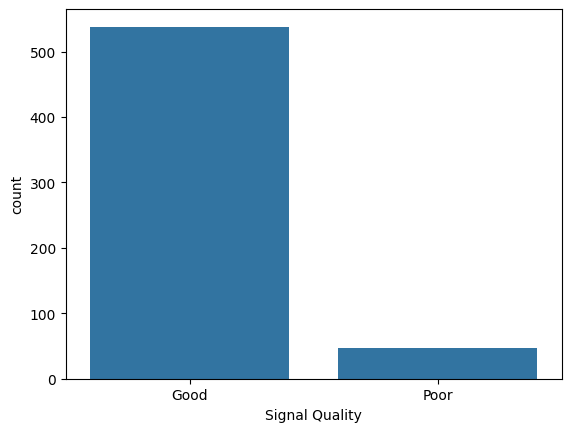

In [18]:
sns.countplot(data, x="Signal Quality")

In [19]:
data[data["Signal Quality"] == "Poor"].describe()

,Tx,Rx,Various Points,SNR Receiver,SNR Stages,BER Receiver,BER Environmental,Modulation Depth,Transmission Distance,Distance Between,Fiber Attenuation,Splice Losses,Optical Amplifier Gain,PMD Coefficient,CD Coefficient,Temperature,Humidity
count,47.000000,47.000000,47.000000,47.000000,47.000000,4.700000e+01,4.700000e+01,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,9.631915,14.404255,12.604255,22.974468,21.474468,8.893617e-07,1.189362e-06,0.797872,17.553191,2.553191,0.075532,0.151064,7.553191,0.025532,0.009553,22.553191,57.553191
std,0.374808,0.400520,0.117875,0.184707,0.184707,8.903844e-08,8.903844e-08,0.057064,0.502538,0.502538,0.005025,0.010051,0.502538,0.005025,0.000503,0.502538,0.502538
min,9.200000,13.800000,12.400000,22.600000,21.100000,8.000000e-07,1.100000e-06,0.700000,17.000000,2.000000,0.070000,0.140000,7.000000,0.020000,0.009000,22.000000,57.000000
25%,9.300000,14.000000,12.500000,22.800000,21.300000,8.000000e-07,1.100000e-06,0.800000,17.000000,2.000000,0.070000,0.140000,7.000000,0.020000,0.009000,22.000000,57.000000
50%,9.500000,14.300000,12.600000,23.000000,21.500000,9.000000e-07,1.200000e-06,0.800000,18.000000,3.000000,0.080000,0.160000,8.000000,0.030000,0.010000,23.000000,58.000000
75%,10.100000,14.800000,12.700000,23.200000,21.700000,1.000000e-06,1.300000e-06,0.800000,18.000000,3.000000,0.080000,0.160000,8.000000,0.030000,0.010000,23.000000,58.000000
max,10.200000,14.900000,12.800000,23.200000,21.700000,1.000000e-06,1.300000e-06,0.900000,18.000000,3.000000,0.080000,0.160000,8.000000,0.030000,0.010000,23.000000,58.000000
